<a href="https://colab.research.google.com/github/siddhanthole74/-Loan-Status-Prediction-using-Machine-Learning/blob/main/Project6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# we have to predict that person is eligible for loan or not 

In [34]:
import pandas as pd
import numpy as np
import seaborn as sns # seaborn are useful for data visualization for  ploting graphs
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

In [ ]:
# loading dataset to the dataframe
df=pd.read_csv('/content/Dataset.csv')

In [ ]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [ ]:
df.shape

(614, 13)

In [ ]:
#statistical measures
df.describe() # example 1. 25 % of people having income <2877.5  2. 50% of people having income <3812.5

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [ ]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
# simply dropping the null values
df=df.dropna()


In [ ]:
df.shape

(480, 13)

In [ ]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [ ]:
#now we are doing label encoding for target values
df.replace({"Loan_Status":{'N':0,'Y':1}},inplace=True)

<ipython-input-12-b3f9c38ff4f9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.replace({"Loan_Status":{'N':0,'Y':1}},inplace=True)


In [ ]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1


In [ ]:
# trying to fetch dependent values
df['Dependents'].value_counts()

0     274
2      85
1      80
3+     41
Name: Dependents, dtype: int64

In [ ]:
#replacing 3+ to 4 

df=df.replace(to_replace='3+',value=4)

In [ ]:
df['Dependents'].value_counts()

0    274
2     85
1     80
4     41
Name: Dependents, dtype: int64

**Data visulization**

<Axes: xlabel='Education', ylabel='count'>

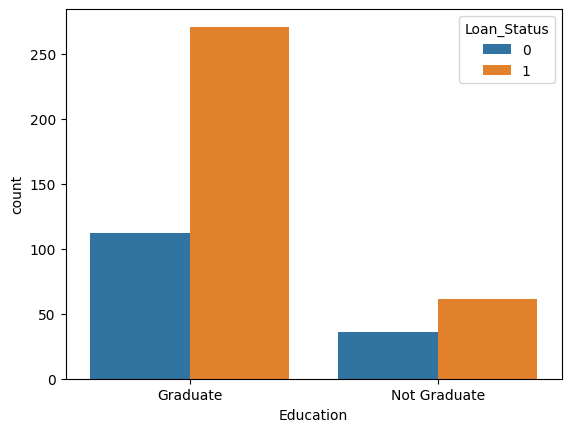

In [ ]:
# education and loan status
sns.countplot(x='Education',hue='Loan_Status',data=df)

<Axes: xlabel='Education', ylabel='count'>

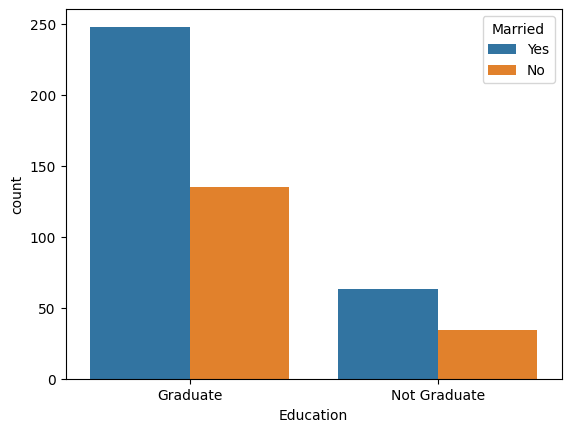

In [ ]:
# martial and loan status
sns.countplot(x='Education',hue='Married',data=df)

In [ ]:
# convert categorical columns to numerical values
df.replace({'Married':{'No':0,'Yes':1},'Gender':{'Male':1,'Female':0},'Self_Employed':{'No':0,'Yes':1},
                      'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2},'Education':{'Graduate':1,'Not Graduate':0}},inplace=True)

In [ ]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1


In [ ]:
# separating the data and label
X = df.drop(columns=['Loan_ID','Loan_Status'],axis=1)
Y = df['Loan_Status']

In [ ]:
print(X)
print(Y)

     Gender  Married Dependents  Education  Self_Employed  ApplicantIncome  \
1         1        1          1          1              0             4583   
2         1        1          0          1              1             3000   
3         1        1          0          0              0             2583   
4         1        0          0          1              0             6000   
5         1        1          2          1              1             5417   
..      ...      ...        ...        ...            ...              ...   
609       0        0          0          1              0             2900   
610       1        1          4          1              0             4106   
611       1        1          1          1              0             8072   
612       1        1          2          1              0             7583   
613       0        0          0          1              1             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_Hi

**Seperating data into train test split**

**1.what is significance of sratify in train test split**
When splitting a dataset into training and testing subsets for machine learning, it is important to ensure that the distribution of the target variable is maintained in both the training and testing sets. This is where the "stratify" parameter comes into play.

When using the "stratify" parameter, the splitting process is done in a way that preserves the proportion of the target variable in both the training and testing sets. This can be particularly important in cases where the target variable is imbalanced, meaning there are significantly more instances of one class than another. In such cases, using stratified sampling can help ensure that each subset contains representative samples of all classes, which can improve the accuracy and reliability of the model.

In summary, using the "stratify" parameter when splitting a dataset into training and testing subsets can help ensure that the distribution of the target variable is maintained in both subsets, which can improve the performance of the machine learning model.

**2.what is significance of random state into train test spit**
The "random_state" parameter in the train-test split function is used to set a seed value for the random number generator that is used to randomly split the data into training and testing sets.

When the random_state parameter is set to a particular value, the random number generator will always produce the same sequence of random numbers, which in turn means that the train-test split will always be the same. This can be useful for ensuring that results are reproducible and can be compared across different runs of the same code.

The random_state parameter can also be used to ensure that different functions or algorithms that use the same train-test split will be working with the same data, which can help to ensure consistency and reduce the likelihood of errors or discrepancies in the results.

In summary, setting the random_state parameter in the train-test split function is useful for reproducibility and consistency in machine learning experiments, and can help to ensure that results are comparable across different runs of the same code.

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.1,stratify=Y,random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(480, 11) (432, 11) (48, 11)


**Training model : Support vector machine**

In [30]:
classifier=svm.SVC(kernel='linear')


In [32]:
classifier.fit(X_train,Y_train)

SVC(kernel='linear')

In [38]:
# accuracy score on training data 
X_train_prediction=classifier.predict(X_train)
training_data_accuracy=accuracy_score(X_train_prediction,Y_train)
print('Accuracy on training data : ', training_data_accuracy)

Accuracy on training data :  0.7986111111111112


In [39]:
#accuracy score on testing data
X_test_prediction=classifier.predict(X_test)
test_data_accuracy=accuracy_score(X_test_prediction,Y_test)
print('Accuracy on test data : ', test_data_accuracy)

Accuracy on test data :  0.8333333333333334
